In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Load dataset
df = pd.read_csv("voice.csv")

# Check initial class distribution
print("Class Distribution Before Balancing:")
print(df['label'].value_counts())


Class Distribution Before Balancing:
label
male      1584
female    1584
Name: count, dtype: int64


In [33]:
# Separate majority and minority classes
df_male = df[df['label'] == 'male']
df_female = df[df['label'] == 'female']

# Upsample minority class if needed
if len(df_male) > len(df_female):
    df_female_upsampled = resample(df_female, replace=True, n_samples=len(df_male), random_state=42)
    df_balanced = pd.concat([df_male, df_female_upsampled])
elif len(df_female) > len(df_male):
    df_male_upsampled = resample(df_male, replace=True, n_samples=len(df_female), random_state=42)
    df_balanced = pd.concat([df_male_upsampled, df_female])
else:
    df_balanced = df

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class Distribution After Balancing:")
print(df_balanced['label'].value_counts())


Class Distribution After Balancing:
label
female    1584
male      1584
Name: count, dtype: int64


In [34]:
X = df_balanced.drop('label', axis=1)
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [35]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[461   8]
 [ 14 468]]

Classification Report:
              precision    recall  f1-score   support

      female       0.97      0.98      0.98       469
        male       0.98      0.97      0.98       482

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

Test Accuracy: 0.9768664563617245


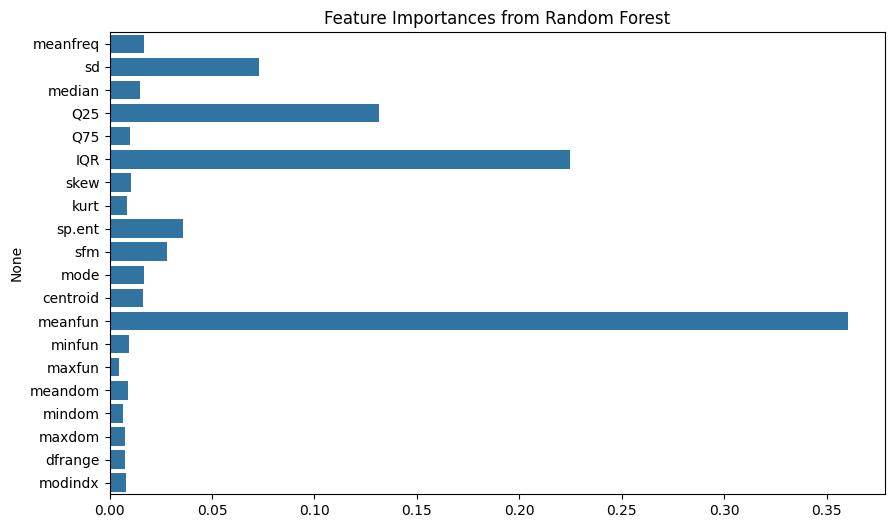

In [36]:
importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances from Random Forest")
plt.show()


In [37]:
real_male_sample = df[df['label'] == 'male'].iloc[[0]].drop('label', axis=1)
real_female_sample = df[df['label'] == 'female'].iloc[[0]].drop('label', axis=1)

print("Prediction on actual male sample:", model.predict(real_male_sample)[0])
print("Prediction on actual female sample:", model.predict(real_female_sample)[0])


Prediction on actual male sample: male
Prediction on actual female sample: female


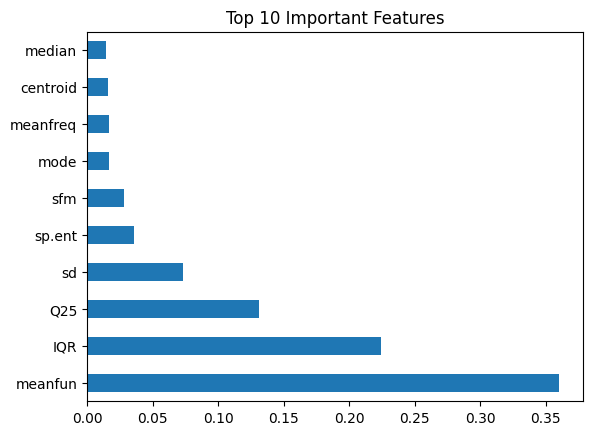

In [38]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()
